## Import Dependancies

In [50]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KDTree
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from wordcloud import WordCloud, STOPWORDS
#from sklearn.metrics import confusion_matrix, classification_report


In [51]:
# File to Load (Remember to Change These)
data = "../Resources/FINAL_CLEAN_FILE.csv"

# read to dataframe
data_df = pd.read_csv(data)
data_df.head()


,VAERS_ID,SYMPTOM,ASSIGNED_GROUP,SEVERITY_LEVEL,DIED,L_THREAT,HOSPITAL,AGE_YRS,AGE_GROUP,OTHER_MEDS,...,VAX_SITE_RA,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-95,96 +
0,916600,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,33.0,26-35,0.0,...,0.0,0,1,0,0,0,0,0,0,0
1,917168,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,64.0,56-65,1.0,...,1.0,0,0,0,0,1,0,0,0,0
2,918386,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,62.0,56-65,1.0,...,1.0,0,0,0,0,1,0,0,0,0
3,918393,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,62.0,56-65,1.0,...,1.0,0,0,0,0,1,0,0,0,0
4,918479,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,37.0,36-45,1.0,...,1.0,0,0,1,0,0,0,0,0,0


In [52]:
severity = data_df['SEVERITY_LEVEL'].unique()
severity


array(['MILD', 'MODERATE', 'SEVERE'], dtype=object)

## Prep Data For Model

In [55]:
# create train data
X = data_df.drop(['VAERS_ID', 'SYMPTOM','ASSIGNED_GROUP','SEVERITY_LEVEL','HOSPITAL', 'DIED', 'L_THREAT', 'CUR_ILL', 'VAX_SITE_LA', 'VAX_SITE_RA', 'AGE_YRS', 'AGE_GROUP'], axis=1)
X


,OTHER_MEDS,HISTORY,PRIOR_VAX,ALLERGIES,F,M,JANSSEN,MODERNA,PFIZER,VAX_DOSE_SERIES_1,VAX_DOSE_SERIES_2,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-95,96 +
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0
1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0,0,1,0,0,0,0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0,0,1,0,0,0,0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0,0,1,0,0,0,0
4,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26477,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0,1,0,0,0
26478,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0,0,0,0,0,1,0,0
26479,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0,0,0,0,0,1,0,0
26480,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0,0,0,0,0,1,0,0


In [56]:
# convert the serverity labels to numbers and create the target data
y = LabelEncoder().fit_transform(data_df['SEVERITY_LEVEL'])
y


array([0, 0, 0, ..., 2, 1, 1])

In [57]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
X_train

,OTHER_MEDS,HISTORY,PRIOR_VAX,ALLERGIES,F,M,JANSSEN,MODERNA,PFIZER,VAX_DOSE_SERIES_1,VAX_DOSE_SERIES_2,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-95,96 +
12,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0,0,1,0,0,0,0
9280,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0
1067,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0
18597,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0
17354,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20691,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0,0,0,1,0,0,0
5699,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,1,0,0,0,0
10742,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0
16921,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0


In [58]:
# Scaling the train data with StandardScaler()
# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)


## Testing KNN to Determine Best k value

k: 1, Train/Test Score: 0.852/0.839
k: 3, Train/Test Score: 0.894/0.886
k: 5, Train/Test Score: 0.888/0.884
k: 7, Train/Test Score: 0.897/0.895
k: 9, Train/Test Score: 0.897/0.897
k: 11, Train/Test Score: 0.897/0.897
k: 13, Train/Test Score: 0.900/0.899
k: 15, Train/Test Score: 0.900/0.899
k: 17, Train/Test Score: 0.900/0.899
k: 19, Train/Test Score: 0.900/0.899


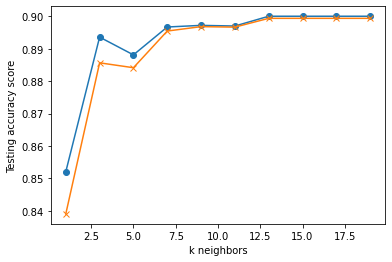

In [8]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()


Based on the scores above, we will move forward with 5 neighbors for our model. This was run on 3 random states (33, 42, 7) and all began to stabilize at k=5. 

## Create KNN Model 

In [86]:
# Note that k: 5 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test, y_test))


k=5 Test Acc: 0.899


In [77]:
from pprint import pprint

In [78]:
# create empty slots
base_parms = X_train.head(1).to_dict(orient='records')[0]
for key,_ in base_parms.items():
    base_parms[key] = 0.0
base_parms    

{'OTHER_MEDS': 0.0,
 'HISTORY': 0.0,
 'PRIOR_VAX': 0.0,
 'ALLERGIES': 0.0,
 'F': 0.0,
 'M': 0.0,
 'JANSSEN': 0.0,
 'MODERNA': 0.0,
 'PFIZER': 0.0,
 'VAX_DOSE_SERIES_1': 0.0,
 'VAX_DOSE_SERIES_2': 0.0,
 '18-25': 0.0,
 '26-35': 0.0,
 '36-45': 0.0,
 '46-55': 0.0,
 '56-65': 0.0,
 '66-75': 0.0,
 '76-85': 0.0,
 '86-95': 0.0,
 '96 +': 0.0}

In [79]:
Web_Entered_User_Age = '56-65'
second_vax = True
pred_parms = base_parms.copy()
pred_parms[Web_Entered_User_Age] = 1.0
if second_vax:
    pred_parms['VAX_DOSE_SERIES_2'] = 1.0
pred_parms

{'OTHER_MEDS': 0.0,
 'HISTORY': 0.0,
 'PRIOR_VAX': 0.0,
 'ALLERGIES': 0.0,
 'F': 0.0,
 'M': 0.0,
 'JANSSEN': 0.0,
 'MODERNA': 0.0,
 'PFIZER': 0.0,
 'VAX_DOSE_SERIES_1': 0.0,
 'VAX_DOSE_SERIES_2': 1.0,
 '18-25': 0.0,
 '26-35': 0.0,
 '36-45': 0.0,
 '46-55': 0.0,
 '56-65': 1.0,
 '66-75': 0.0,
 '76-85': 0.0,
 '86-95': 0.0,
 '96 +': 0.0}

In [84]:
pred_parms_final = pd.DataFrame([pred_parms]).values

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 0.]])

In [60]:
X.columns


Index(['OTHER_MEDS', 'HISTORY', 'PRIOR_VAX', 'ALLERGIES', 'F', 'M', 'JANSSEN',
       'MODERNA', 'PFIZER', 'VAX_DOSE_SERIES_1', 'VAX_DOSE_SERIES_2', '18-25',
       '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95', '96 +'],
      dtype='object')

In [61]:
# Sample Prediction 1
sample_user1 = [[1,1,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1]]
predicted_symptoms = knn.predict(sample_user1)
# print(severity[predicted_symptoms])
print(severity[predicted_symptoms])


['MILD']


In [63]:
# 5 people closest to user 1
tree = KDTree(X)
dist, ind = tree.query(sample_user1, k=200)

#convery ndarry to list 
like_users = ind[0].tolist()
print(like_users)  # indices of 5 closest neighbors


[24399, 9823, 21509, 5771, 7598, 15392, 5634, 19147, 4421, 4169, 10413, 26333, 20640, 5074, 25028, 20781, 8215, 8773, 20582, 13471, 11307, 26475, 26203, 26190, 25376, 25930, 26034, 24058, 23928, 3701, 23585, 23992, 19770, 19351, 12161, 19018, 6698, 14416, 5644, 17846, 10403, 14661, 26315, 26461, 12584, 16428, 26291, 22006, 25503, 3820, 9782, 518, 11224, 6380, 25467, 26092, 24203, 24313, 9437, 24564, 24788, 24825, 24974, 25089, 2736, 12406, 12315, 19533, 12227, 12274, 18725, 12068, 11736, 4974, 6856, 6870, 6895, 14279, 5154, 283, 19164, 7169, 7195, 18348, 3948, 26316, 4518, 26454, 12861, 4579, 26127, 26249, 10091, 26193, 14039, 26330, 11386, 25233, 25574, 25347, 25378, 9906, 25396, 25410, 4411, 4406, 25974, 25982, 26049, 9807, 26069, 26072, 17364, 18772, 24222, 16081, 24378, 23737, 23761, 9100, 23476, 23456, 24789, 24793, 14626, 24963, 23974, 25068, 25206, 2784, 7173, 12325, 15908, 7781, 11094, 25179, 10449, 4273, 10915, 3015, 10475, 12094, 12313, 4512, 4545, 4367, 10490, 12137, 2628, 6

In [64]:
# save nearest 50 neighbors symptoms as list for wordcloud
predicted_symptoms = data_df['ASSIGNED_GROUP'].iloc[like_users].tolist()
predicted_symptoms[:5]


['Pulmonary', 'Cough', 'Neck pain', 'Chills', 'Joint Pain/Discomfort']

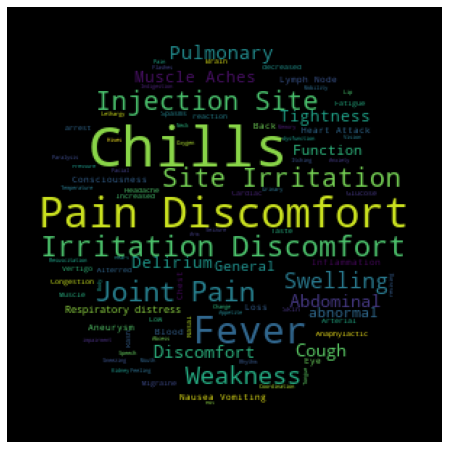

In [65]:
#convert list to string and generate
unique_string=(" ").join(predicted_symptoms)

#create circle mask
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(width = 1000, height = 500, mask=mask).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
#plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()


In [66]:
# Sample Prediction 2
sample_user2 = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
new_array = sample_user2.reshape(1, 20)
predicted_symptoms = knn.predict(new_array)
print(severity[predicted_symptoms])


['MILD']


In [67]:
# 5 people closest to user 1
tree = KDTree(X)
dist, ind = tree.query(sample_user1, k=200)

#convery ndarry to list 
like_users = ind[0].tolist()
print(like_users)  # indices of 5 closest neighbors



[24399, 9823, 21509, 5771, 7598, 15392, 5634, 19147, 4421, 4169, 10413, 26333, 20640, 5074, 25028, 20781, 8215, 8773, 20582, 13471, 11307, 26475, 26203, 26190, 25376, 25930, 26034, 24058, 23928, 3701, 23585, 23992, 19770, 19351, 12161, 19018, 6698, 14416, 5644, 17846, 10403, 14661, 26315, 26461, 12584, 16428, 26291, 22006, 25503, 3820, 9782, 518, 11224, 6380, 25467, 26092, 24203, 24313, 9437, 24564, 24788, 24825, 24974, 25089, 2736, 12406, 12315, 19533, 12227, 12274, 18725, 12068, 11736, 4974, 6856, 6870, 6895, 14279, 5154, 283, 19164, 7169, 7195, 18348, 3948, 26316, 4518, 26454, 12861, 4579, 26127, 26249, 10091, 26193, 14039, 26330, 11386, 25233, 25574, 25347, 25378, 9906, 25396, 25410, 4411, 4406, 25974, 25982, 26049, 9807, 26069, 26072, 17364, 18772, 24222, 16081, 24378, 23737, 23761, 9100, 23476, 23456, 24789, 24793, 14626, 24963, 23974, 25068, 25206, 2784, 7173, 12325, 15908, 7781, 11094, 25179, 10449, 4273, 10915, 3015, 10475, 12094, 12313, 4512, 4545, 4367, 10490, 12137, 2628, 6

# Save the Model

In [68]:
# save model
with open(f'../knn_model2.sav', 'wb') as f:
    pickle.dump(knn, f)
    

# Practice Input

In [70]:
features_np = ['OTHER_MEDS', 'HISTORY', 'PRIOR_VAX', 'ALLERGIES', 'F', 'M', 'JANSSEN', 'MODERNA', 'PFIZER',
       'VAX_DOSE_SERIES_1', 'VAX_DOSE_SERIES_2', '18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95',
       '96 +']
user_input = np.zeros(len(features_np))


In [71]:
age_group = '36-45'
sex = 'F'
other_meds = 0
history = 0
prior_vax = 0
allergies = 0
vax_name = 'PFIZER'
vax_dose = '2'

age_idx = features_np.index(f'{age_group}')
sex_idx = features_np.index(f'{sex}')
vax_idx = features_np.index(f'{vax_name}')
dose_idx = features_np.index(f'VAX_DOSE_SERIES_{vax_dose}')

user_input[0] = other_meds
user_input[1] = history
user_input[2] = prior_vax
user_input[3] = allergies
user_input[sex_idx] = 1
user_input[vax_idx] = 1
user_input[dose_idx] = 1
user_input[age_idx] = 1


print(user_input)


[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


# Predict

In [72]:
# Real Prediction
user_test = user_input
predicted_symptoms = knn.predict([user_test])
print(severity[predicted_symptoms])

['MILD']


In [22]:
user_input2 = np.zeros(len(features_np))

In [23]:
age_group = '56-65'
sex = 'F'
other_meds = 1
history = 1
prior_vax = 1
allergies = 1
vax_name = 'PFIZER'
vax_dose = '2'

age_idx = features_np.index(f'{age_group}')
sex_idx = features_np.index(f'{sex}')
vax_idx = features_np.index(f'{vax_name}')
dose_idx = features_np.index(f'VAX_DOSE_SERIES_{vax_dose}')

user_input2[0] = other_meds
user_input2[1] = history
user_input2[2] = prior_vax
user_input2[3] = allergies
user_input2[sex_idx] = 1
user_input2[vax_idx] = 1
user_input2[dose_idx] = 1
user_input2[age_idx] = 1


print(user_input2)

[1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [24]:
# Real Prediction
user_test2 = user_input2
predicted_symptoms2 = knn.predict([user_test2])
print(severity[predicted_symptoms2])

['MILD']


In [25]:
user_input3 = np.zeros(len(features_np))

age_group = '46-55'
sex = 'F'
other_meds = 1
history = 1
prior_vax = 1
allergies = 1
vax_name = 'JANSSEN'
vax_dose = '2'

age_idx = features_np.index(f'{age_group}')
sex_idx = features_np.index(f'{sex}')
vax_idx = features_np.index(f'{vax_name}')
dose_idx = features_np.index(f'VAX_DOSE_SERIES_{vax_dose}')

user_input3[0] = other_meds
user_input3[1] = history
user_input3[2] = prior_vax
user_input3[3] = allergies
user_input3[sex_idx] = 1
user_input3[vax_idx] = 1
user_input3[dose_idx] = 1
user_input3[age_idx] = 1


print(user_input3)

[1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [26]:
# Real Prediction
user_test3 = user_input3
predicted_symptoms3 = knn.predict([user_test3])
print(severity[predicted_symptoms3])

['MILD']


In [41]:
# 5 people closest to user 1
tree = KDTree(X)
dist, ind = tree.query([user_input3], k=200)

#convery ndarry to list 
like_users3 = ind[0].tolist()
print(like_users3)  # indices of 5 closest neighbors


[11312, 6089, 8710, 8883, 9874, 24178, 8521, 25645, 24398, 7102, 5716, 3200, 6056, 21240, 24874, 11079, 9908, 20733, 21730, 6032, 21381, 1577, 21298, 3418, 3137, 17552, 7588, 14452, 19112, 5670, 7782, 19655, 7143, 12548, 4922, 17396, 4130, 14234, 11088, 19293, 7722, 19669, 18785, 18951, 7516, 17147, 14429, 14255, 7093, 2726, 5680, 7043, 17626, 17591, 13068, 6510, 4580, 17012, 14233, 7109, 12544, 13606, 2737, 50, 11346, 16776, 18346, 7127, 11257, 236, 21070, 11384, 7597, 7467, 19791, 18152, 4508, 4814, 19289, 7657, 7720, 4772, 2971, 19379, 2265, 7323, 7318, 2795, 18656, 386, 6517, 14244, 10168, 5536, 14216, 2615, 12933, 17645, 14292, 17747, 1762, 2728, 14489, 16885, 11619, 17059, 17588, 14315, 5052, 4532, 13041, 13066, 13552, 11905, 4854, 4881, 4586, 2759, 18101, 2734, 17729, 17439, 22589, 5630, 18105, 10647, 18116, 18126, 7253, 13328, 2034, 5521, 25418, 7271, 19510, 18714, 385, 13504, 5609, 7074, 10942, 10900, 10182, 4197, 13589, 17592, 5576, 4975, 11624, 1794, 4305, 12108, 6948, 7340,

In [42]:
# save nearest 50 neighbors symptoms as list for wordcloud
predicted_symptoms30 = data_df['ASSIGNED_GROUP'].iloc[like_users3].tolist()
predicted_symptoms30[:5]

['Back pain', 'Chills', 'Migraine/Headache', 'Migraine/Headache', 'Cough']

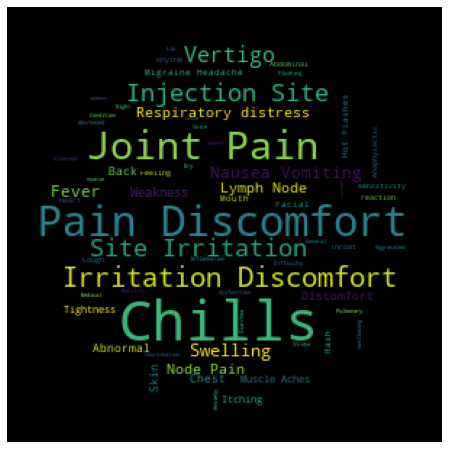

In [43]:
#convert list to string and generate
unique_string=(" ").join(predicted_symptoms30)

#create circle mask
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(width = 1000, height = 500, mask=mask).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
#plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()
